In [5]:
#Description: This program attempts to optimize a users portfolio using the Efficient Frontier

#Import the python libraries
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Get the stock symbols tickers in the portfolio
assets = ['TSLA','DIS', 'MSFT', 'AMZN', 'AAPL']

# Assign weights to the stocks. Sum must be equal to 1.0
weights=np.array([0.2,0.2,0.2,0.2,0.2])

#stock/portfolio starting/current date
stockStartDate='2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')

# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [ ]:
# Store the adjusted close price of the stock into the dataframe
for stock in assets:
  df[stock]=web.DataReader(stock,'yahoo',start = stockStartDate,end = today)['Adj Close']

df



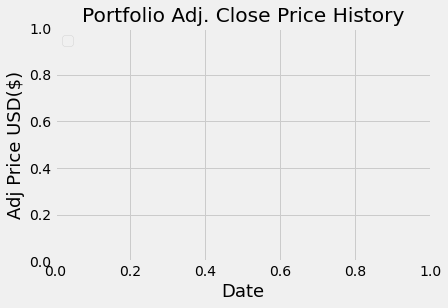

In [10]:
#Create and plot the graph
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks=df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Price USD($)', fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')


In [ ]:
# Show the daily simple return
returns = df.pct_change()

# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252

# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))

#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)

# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252


#Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100) + '%'
percent_vol = str(round(port_volatility,2)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100) + '%'

print('Expected annual return: '+percent_ret)
print('Annual volatility / risk: ' + percent_vol)
print('Annual variance: '+ percent_vol)

In [17]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 4.5 MB/s 
     |████████████████████████████████| 2.7 MB 16.5 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, risk_models

In [19]:
# Portfolio Optimization

#Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimilze for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=2000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


ValueError: ignored